In [1]:
import pandas as pd

In [2]:
G_hydro_1 = pd.read_excel('y_LowerOIrangeEvW_OrigFile.xlsx','y_LowerOIrangeEvW_OrigFile')

In [3]:
# I will only use these following columns
# total number of columns: 20
df1 = G_hydro_1[[
                             'Monitoring Point Name',
                             'Latitude',
                             'Longitude',
                             'Drainage Region Name',
                             'Sample Start Date',
                             'pH-Diss-Water (PH) (pH units) Result',
                             'EC-Phys-Water (ELECTRICAL CONDUCTIVITY) (mS/m) Result',
                             'DMS-Tot-Water (DISSOLVED MAJOR SALTS) (mg/L) Result',
                             'Ca-Diss-Water (CALCIUM) (mg/L) Result',
                             'Mg-Diss-Water (MAGNESIUM) (mg/L) Result',
                             'Na-Diss-Water (SODIUM) (mg/L) Result',
                             'K-Diss-Water (POTASSIUM) (mg/L) Result',
                             'TAL-Diss-Water (TOTAL ALKALINITY AS CALCIUM CARBONATE) (mg/L) Result',
                             'Cl-Diss-Water (CHLORIDE) (mg/L) Result',
                             'SO4-Diss-Water (SULPHATE) (mg/L) Result',
                             'NO3+NO2-N-Diss-Water (NITRATE + NITRITE NITROGEN) (mg/L) Result',
                             'F-Diss-Water (FLUORIDE) (mg/L) Result',
                             'NH4-N-Diss-Water (AMMONIUM NITROGEN) (mg/L) Result',
                             'PO4-P-Diss-Water (ORTHO PHOSPHATE AS PHOSPHORUS) (mg/L) Result',
                             'Si-Diss-Water (SILICON) (mg/L) Result']]

In [4]:
# I create a new df with better naming
# 
GRU_df = pd.DataFrame()
#GRU_df['latitude'] = df1['Latitude']
#GRU_df['longitude'] = df1['Longitude']

GRU_df['Drainage Region Name'] = df1['Drainage Region Name']
GRU_df['EC-(mS/m)'] = df1['EC-Phys-Water (ELECTRICAL CONDUCTIVITY) (mS/m) Result']
GRU_df['pH-Diss-Water (PH)'] = df1['pH-Diss-Water (PH) (pH units) Result']
GRU_df['Ca (mg/L)'] = df1['Ca-Diss-Water (CALCIUM) (mg/L) Result']
GRU_df['Mg (mg/L)'] = df1['Mg-Diss-Water (MAGNESIUM) (mg/L) Result']
GRU_df['Na (mg/L)']= df1['Na-Diss-Water (SODIUM) (mg/L) Result']
GRU_df['K (mg/L)'] = df1['K-Diss-Water (POTASSIUM) (mg/L) Result']
GRU_df['TAL CaCO3 (mg/L)'] = df1['TAL-Diss-Water (TOTAL ALKALINITY AS CALCIUM CARBONATE) (mg/L) Result']
GRU_df['Cl (mg/L)'] = df1['Cl-Diss-Water (CHLORIDE) (mg/L) Result']
GRU_df['SO4 (mg/L)'] = df1['SO4-Diss-Water (SULPHATE) (mg/L) Result']
GRU_df['F (mg/L)'] = df1['F-Diss-Water (FLUORIDE) (mg/L) Result']

In [5]:
# Define the mapping between drainage regions and resource units 23 GRU's
resource_units = {
    'GRU1': ['D71A','D71C','D71D','D72A','D72B','D73B','D72C','D73C','D73D','D73E','D73F'],
    
    'GRU2': ['D81A','D81B','D81D','D81E','D81F','D81G'],
    
    'GRU3': ['D82A','D82B','D82C','D82D',],
    
    'GRU4.1': ['D82E','D82F','D82G','D82H','D82J','D82K','D82L'],
    
    'GRU4.2': ['F10A','F10B','F10C','F20C','F20D','F20E'],
    
    'GRU6.1': ['D61A','D61B','D61C','D61D','D61E','D61F','D61G','D61H','D62C','D62D'],
    
    'GRU6.2': ['D61J','D61K','D61L','D61M','D62A','D62B','D62E','D62F'],
    
    'GRU6.3': ['D62H','D62G','D62J'],
    
    'GRU7.1': ['D51B','D51C','D52C','D55A','D55B','D55C','D55D','D55E','D55G','D55K','D56D','D56F','D56G','D56H','D56J'],
    
    'GRU7.2': ['D54A','D54B','D54C','D55F','D55H','D55J','D55L','D52D','D52E','D52F','D58A'],
    
    'GRU7.3': ['D53F','D54D','D54F','D57D'],
    
    'GRU7.4': ['D51A','D52A','D52B','D56A','D56B','D56C','D56E'],
    
    'GRU7.5': ['D54E','D55M','D57A','D57B','D57C','D58B','D58C'],
    
    'GRU7.6': ['D53D','D53G','D54G','D57E'],
    
    'GRU7.7': ['D53A','D53B','D53C','D53E','D53H','D53J'],
    
    'GRU8.1': ['F30A','F30B','F30C','F30D','F30E'],
    
    'GRU8.2': ['F40B','F40C','F40E','F40G','F50A','F50B','F50C','F50E','F50F','F20A','F20B','F20B','F20B','F30F','F30G'],
    
    'GRU8.3': ['F40A','F40D','F40F','F40H','F50G','F60A','F60B','F60C','F60D','F60E'],
    
    'GRU9.1': ['D41B','D41C','D41D','D41E','D41F','D41H','D41M'],
    
    'GRU9.2': ['D41G','D41L','D41J','D41K'],
    
    'GRU9.3': ['D71B','D73A'],
    
    'GRU10.1': ['D42A','D42B','D42C','D42D'],
    
    'GRU10.2': ['D42E','D81C']
}

# Create a new column 'resource_unit'
GRU_df['resource_unit'] = None

# Populate the 'resource_unit' column
def get_resource_unit(drainage_region):
    for ru, regions in resource_units.items():
        if drainage_region in regions:
            return ru
    return None

GRU_df['resource_unit'] = GRU_df['Drainage Region Name'].apply(get_resource_unit)

#print(GRU_df)

In [6]:
GRU_df = GRU_df.dropna()

In [7]:
print(GRU_df.isnull().sum())

Drainage Region Name    0
EC-(mS/m)               0
pH-Diss-Water (PH)      0
Ca (mg/L)               0
Mg (mg/L)               0
Na (mg/L)               0
K (mg/L)                0
TAL CaCO3 (mg/L)        0
Cl (mg/L)               0
SO4 (mg/L)              0
F (mg/L)                0
resource_unit           0
dtype: int64


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from sklearn.model_selection import learning_curve

In [9]:
# Count observations per resource unit
resource_unit_counts = GRU_df['resource_unit'].value_counts()

# Filter for resource units with at least 500 observations
resource_units_with_1000_or_more = resource_unit_counts[resource_unit_counts >= 1000]

# Print the results
print(resource_units_with_1000_or_more)

GRU6.1     2341
GRU10.1    1936
GRU7.1     1136
Name: resource_unit, dtype: int64


In [10]:
print(resource_unit_counts)

GRU6.1     2341
GRU10.1    1936
GRU7.1     1136
GRU1        961
GRU7.2      564
GRU6.2      461
GRU8.2      391
GRU7.4      383
GRU7.7      366
GRU10.2     336
GRU2        274
GRU7.6      259
GRU6.3      235
GRU8.1      213
GRU7.3      193
GRU4.1      179
GRU7.5      125
GRU8.3       98
GRU3         86
GRU9.3       63
GRU4.2       54
Name: resource_unit, dtype: int64


# Feedforward Neural network with all GRU's

In [11]:
GRU_df = GRU_df.drop('Drainage Region Name', axis=1)

# Separate features and target variable
X = GRU_df.drop('resource_unit', axis=1)
y = GRU_df['resource_unit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create an ANN model with early stopping
model_ANN = MLPClassifier(hidden_layer_sizes=(130, 60), activation='relu', solver='adam', random_state=43,
                     early_stopping=True,
                     max_iter=1000,  # Maximum number of epochs
                     validation_fraction=0.1,  # Fraction of data for validation
                     tol=1e-4  # Tolerance for stopping
                     )

# Train the model
model_ANN.fit(X_train, y_train)

# Make predictions
y_pred = model_ANN.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5082121069920226
              precision    recall  f1-score   support

        GRU1       0.69      0.40      0.50       194
     GRU10.1       0.73      0.80      0.76       377
     GRU10.2       0.29      0.19      0.23        64
        GRU2       0.25      0.32      0.28        47
        GRU3       0.15      0.38      0.21        16
      GRU4.1       0.81      0.52      0.64        42
      GRU4.2       0.00      0.00      0.00         8
      GRU6.1       0.56      0.80      0.66       485
      GRU6.2       0.35      0.13      0.19        95
      GRU6.3       0.17      0.09      0.12        44
      GRU7.1       0.46      0.43      0.44       241
      GRU7.2       0.40      0.37      0.38       104
      GRU7.3       1.00      0.08      0.15        37
      GRU7.4       0.33      0.05      0.08        86
      GRU7.5       0.06      0.13      0.08        23
      GRU7.6       0.11      0.38      0.18        48
      GRU7.7       0.15      0.03      0.04        7

In [15]:
train_sizes, train_scores, test_scores = learning_curve(model_ANN, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

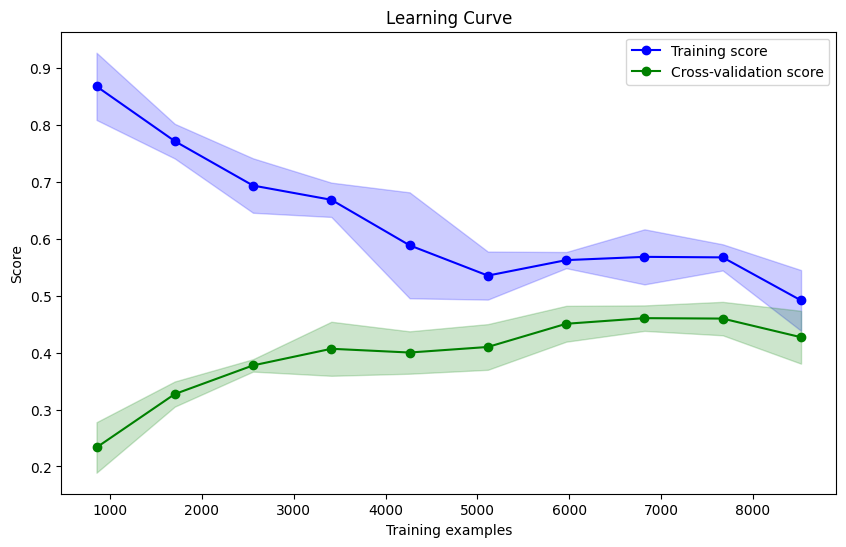

In [16]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,  
 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="green", alpha=0.2)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [17]:
GRU_df.head()

,EC-(mS/m),pH-Diss-Water (PH),Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),TAL CaCO3 (mg/L),Cl (mg/L),SO4 (mg/L),F (mg/L),resource_unit
0,40.0,8.42,29.8,12.2,28.6,2.53,120.9,25.3,29.6,0.22,GRU4.1
1,37.3,8.27,29.1,11.3,23.5,2.56,122.8,19.0,35.1,0.24,GRU4.1
2,36.9,8.18,27.6,10.6,25.0,2.77,108.8,16.8,29.2,0.25,GRU4.1
3,38.3,8.16,30.8,11.4,24.1,2.81,112.7,17.7,39.7,0.23,GRU4.1
4,35.2,8.18,28.6,10.6,20.8,2.27,100.0,14.2,35.2,0.21,GRU4.1


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
GRU_df['resource_unit'] = le.fit_transform(GRU_df['resource_unit'])

# Create a dictionary mapping encoded values to original labels
label_mapping = dict(zip(le.transform(le.classes_), le.classes_))

with open('label_mapping.pkl', 'wb') as f:
    pickle.dump(label_mapping, f)

In [19]:
X = GRU_df.drop('resource_unit', axis=1)
y = GRU_df['resource_unit']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Deep neural network ( Multi-Layer Perceptron)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model_dnn = Sequential()
model_dnn.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))  # Add a comma after X.shape[1]
#model_dnn.add(Dense(128, activation='relu')) 
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dense(len(le.classes_), activation='softmax'))

model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dnn_fitted = model_dnn.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200


C:\Users\ettie\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2429 - loss: 43.9771 - val_accuracy: 0.2529 - val_loss: 16.1912
Epoch 2/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3295 - loss: 8.3735 - val_accuracy: 0.3534 - val_loss: 6.8033
Epoch 3/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3737 - loss: 6.3799 - val_accuracy: 0.3196 - val_loss: 12.6232
Epoch 4/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3617 - loss: 6.8689 - val_accuracy: 0.3468 - val_loss: 8.1648
Epoch 5/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3650 - loss: 6.3199 - val_accuracy: 0.4496 - val_loss: 5.3375
Epoch 6/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3986 - loss: 4.3397 - val_accuracy: 0.4101 - val_loss: 5.0241
Epoch 7/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3687 - loss: 4.8105 - val_accuracy: 0.4073 - val_loss: 2.4601
Epoch 8/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3881 - loss: 2.2891 - val_accuracy: 0.4

267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5718 - loss: 1.3740 - val_accuracy: 0.5537 - val_loss: 1.4332
Epoch 52/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5811 - loss: 1.3424 - val_accuracy: 0.5551 - val_loss: 1.4232
Epoch 53/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5828 - loss: 1.3308 - val_accuracy: 0.5626 - val_loss: 1.4001
Epoch 54/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5807 - loss: 1.3333 - val_accuracy: 0.5612 - val_loss: 1.4731
Epoch 55/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5762 - loss: 1.3675 - val_accuracy: 0.5594 - val_loss: 1.3916
Epoch 56/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5777 - loss: 1.3263 - val_accuracy: 0.5542 - val_loss: 1.4150
Epoch 57/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5774 - loss: 1.3054 - val_accuracy: 0.5767 - val_loss: 1.4115
Epoch 58/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5619 - loss: 1.3862 - val_accuracy:

267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6279 - loss: 1.1411 - val_accuracy: 0.6044 - val_loss: 1.3413
Epoch 102/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6380 - loss: 1.1201 - val_accuracy: 0.6007 - val_loss: 1.3781
Epoch 103/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6348 - loss: 1.1043 - val_accuracy: 0.5922 - val_loss: 1.3679
Epoch 104/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6312 - loss: 1.1567 - val_accuracy: 0.5673 - val_loss: 1.4704
Epoch 105/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6241 - loss: 1.1792 - val_accuracy: 0.6049 - val_loss: 1.3968
Epoch 106/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6376 - loss: 1.1197 - val_accuracy: 0.6039 - val_loss: 1.3703
Epoch 107/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6395 - loss: 1.1052 - val_accuracy: 0.5889 - val_loss: 1.4107
Epoch 108/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6378 - loss: 1.1221 - val_ac

267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6843 - loss: 0.9887 - val_accuracy: 0.6138 - val_loss: 1.5799
Epoch 200/200
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6633 - loss: 0.9896 - val_accuracy: 0.6312 - val_loss: 1.4921


In [22]:
model_dnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 21)                  │           1,365 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,089 (129.26 KB)

 Trainable params: 11,029 (43.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,060 (86.18 KB)

In [31]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model_dnn.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))  # Use argmax for class labels
print(cm)

# Print classification report
print("\nClassification Report of Deep Neural Network:\n", classification_report(y_test, np.argmax(y_pred, axis=1)))

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[162   6   1   1   0   0   0  15   2   7   1   1   3   0   0   6   4   0
    0   1   5]
 [  8 362   5   0   0   1   0  10   1   2   2   3   0   3   1   3   1   0
    5   0   0]
 [  3  24  33   3   1   0   0   1   0   0   0   0   0   0   0   1   4   0
    2   0   0]
 [  4   6   3  28   3   1   0   2   0   0   0   0   1   0   0   6   9   0
    0   0   0]
 [  0   1   0   1  12   0   0   1   0   0   0   0   0   0   0   0   2   3
    2   0   0]
 [  0   2   0   1   0  17   0   1   0   0   0   0   0   0   0   0   0   2
    3   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1
    8   0   0]
 [ 32   3   0   0   0   0   0 365   9   1  42   4   1   3   4   2   3   1
    3   0   0]
 [  8  10   1   0   0   0   0  35  18   1  12   1   0   0   0   0   1   0
    1   0   0]
 [ 16   0   0   0   0   0   0  11   2  11   1   0   0   0   0   3   0   0
    0   1   1]
 [ 14   4   3   0   0   0   0  47   4   0 127   3   3  16   0   2   1  

In [28]:
GRU_df.head()

,EC-(mS/m),pH-Diss-Water (PH),Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),TAL CaCO3 (mg/L),Cl (mg/L),SO4 (mg/L),F (mg/L),resource_unit
0,40.0,8.42,29.8,12.2,28.6,2.53,120.9,25.3,29.6,0.22,5
1,37.3,8.27,29.1,11.3,23.5,2.56,122.8,19.0,35.1,0.24,5
2,36.9,8.18,27.6,10.6,25.0,2.77,108.8,16.8,29.2,0.25,5
3,38.3,8.16,30.8,11.4,24.1,2.81,112.7,17.7,39.7,0.23,5
4,35.2,8.18,28.6,10.6,20.8,2.27,100.0,14.2,35.2,0.21,5


In [29]:
# Save the model in pickle format
with open('model_dnn.pkl', 'wb') as f:
    pickle.dump(model_dnn, f)

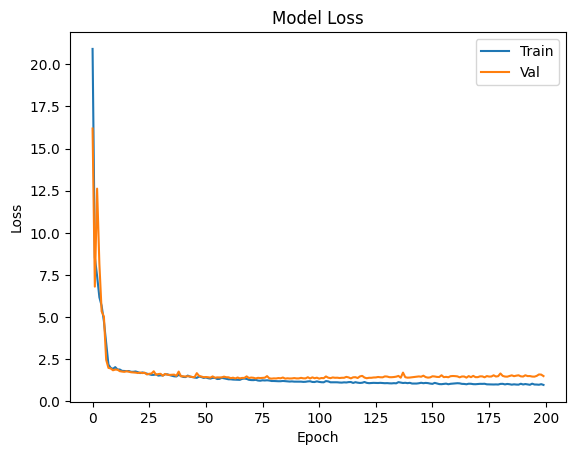

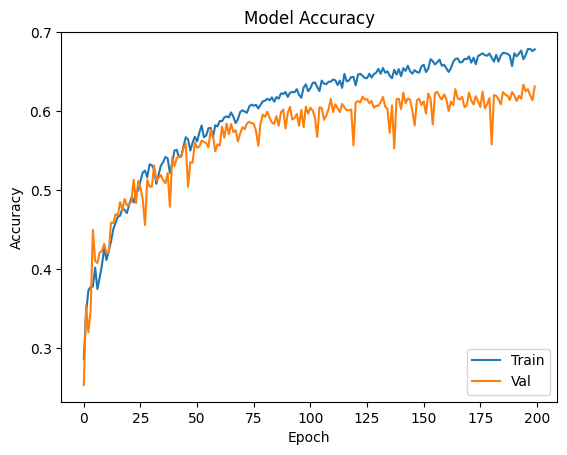

In [30]:
# Plot training and validation loss
plt.plot(model_dnn_fitted.history['loss'])  

plt.plot(model_dnn_fitted.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot training and validation accuracy (if available)
if 'accuracy' in model_dnn_fitted.history.keys():
  plt.plot(model_dnn_fitted.history['accuracy'])
  plt.plot(model_dnn_fitted.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')  

  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.show()